In [103]:
import h5py
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
from h5py import Group

from neurodsp.plts import plot_time_series
from neurodsp.filt import filter_signal
import numpy as np


### Background

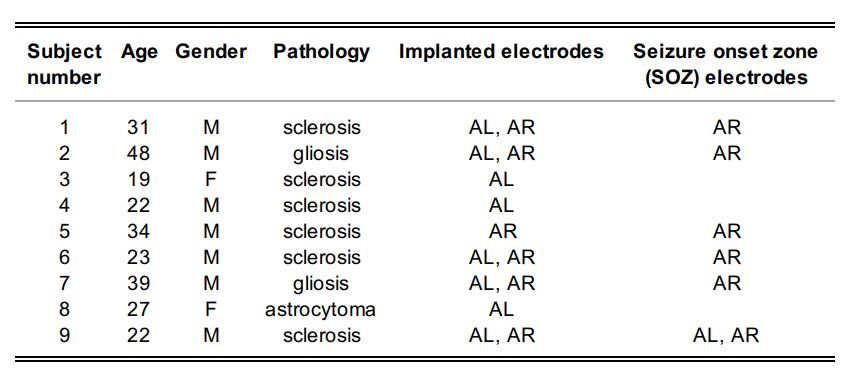

In [104]:
# create an Empty DataFrame object 
data = pd.DataFrame() 
subject_Age = [31,48,19,22,34,23,39,27,22]
subject_Gender = [1,1,0,1,1,1,1,0,1]
subject_Electrodes = [['AL','AR'],['AL','AR'],['AL'],['AL'],['AR'],['AL','AR'],['AL','AR'],['AL'],['AL','AR']]
subject_Pathology = ['sclerosis','gliosis','sclerosis','sclerosis','sclerosis','sclerosis','gliosis','astrocytoma','sclerosis']
subject_siezureZone = [['AR'],['AR'],['none'],['none'],['AR'],['AR'],['AR'],['none'],['AL','AR']]
data["Age"] = subject_Age
data["Gender"] = subject_Gender
data["Pathology"] = subject_Pathology
data["Implanted Electrodes"] = subject_Electrodes
data["Siezure Onset Zone"] = subject_siezureZone
data

,Age,Gender,Pathology,Implanted Electrodes,Siezure Onset Zone
0,31,1,sclerosis,"[AL, AR]",[AR]
1,48,1,gliosis,"[AL, AR]",[AR]
2,19,0,sclerosis,[AL],[none]
3,22,1,sclerosis,[AL],[none]
4,34,1,sclerosis,[AR],[AR]
5,23,1,sclerosis,"[AL, AR]",[AR]
6,39,1,gliosis,"[AL, AR]",[AR]
7,27,0,astrocytoma,[AL],[none]
8,22,1,sclerosis,"[AL, AR]","[AL, AR]"


For more information on the subject data see this google drive here 

Google Drive
https://drive.google.com/drive/folders/1FW1eMtkcOpRsE3Pk_5svNhImD_yj2g7_?usp=sharing

In [105]:
data_dir = "./data_NIX/"

In [267]:
def unpack_data(h5):

    h5 = h5py.File(h5, 'r')

    data_dict = {}

    subj = list(h5['data'].keys())[0]
    data_arrays = h5['data'][subj]['data_arrays']

    for key in data_arrays.keys():

            if isinstance(data_arrays[key]['data'], h5py._hl.dataset.Dataset):

                data_dict[key] =  np.array(data_arrays[key]['data'])

    return data_dict

In [268]:
subject1 = unpack_data('data_NIX/Data_Subject_01_Session_01.h5')
subject2 = unpack_data('data_NIX/Data_Subject_02_Session_01.h5')
subject3 = unpack_data('data_NIX/Data_Subject_03_Session_01.h5')
subject4 = unpack_data('data_NIX/Data_Subject_04_Session_01.h5')
subject5 = unpack_data('data_NIX/Data_Subject_05_Session_01.h5')
subject6 = unpack_data('data_NIX/Data_Subject_06_Session_01.h5')
subject7 = unpack_data('data_NIX/Data_Subject_07_Session_01.h5')
subject8 = unpack_data('data_NIX/Data_Subject_08_Session_01.h5')
subject9 = unpack_data('data_NIX/Data_Subject_09_Session_01.h5')

In [269]:
# This give you the list of the ket from the subject data
def key_list(subject_data):
    key_list = list(subject_data.keys())
    return key_list

In [158]:
# key_list(subject1)

In [159]:
def get_key(subject_data,key_index):
    keys_list = list(subject_data)
    key = keys_list[key_index]
    return key    

In [160]:
#get_key(subject1,0)

In [207]:
# Helper function returns list data by index keys
def get_data(subject_data,key_index):
    keys_list = list(subject_data)
    key = keys_list[key_index]
    data = list(subject_data[key])
    return data

In [212]:
#get_data(subject1,0)

In [213]:
def create_df(subject_data,key_index):
    key = get_key(subject_data,key_index)
    data = get_data(subject_data,key_index)
    df = pd.DataFrame(data,columns = [key])
    return df

In [214]:
#create_df(subject1,0)

In [215]:
# All of the data for every subject data have the iEEG data, this creates a dataframes of that data when called 
def get_df(subject_data,start,num_trials):
    df = pd.DataFrame()
    j = start
    for i in range(num_trials):    
        df[get_key(subject_data,j)] = get_data(subject_data,j)
        j += 1
    return df

In [239]:
#get_df(subject1,0,17)

In [240]:
# Here I just wanted to see the length of the keys in each subject 
size1 = len(key_list(subject1))
size2 = len(key_list(subject2))
size3 = len(key_list(subject3))
size4 = len(key_list(subject4))
size5 = len(key_list(subject5))
size6 = len(key_list(subject6))
size7 = len(key_list(subject7))
size8 = len(key_list(subject8))
size9 = len(key_list(subject9))
sizes = [size1,size2,size3,size4,size5,size6,size7,size8,size9]
print(sizes)

[91, 235, 73, 145, 19, 19, 307, 19, 19]


So now its obvious that this data is not consistent across the different subjects so now I want to look through each subject and see which one actually have the full dataset that we can you to do further analysis. 

Here I just wanted to explore the data, so that I could get an idea about how to make dataframes that would work

In [241]:
#Subject 1 data has, number of dict keys 91
#17 iEEG Data Trials
# Spike Times -------
#17 uAL-1 Trials
#17 uAL-2 trials
#17 uAL-6 trials
#17 uAR-7 trials
# -------------------
#'Spike_Waveform_Unit_1_uAL_1'
#'Spike_Waveform_Unit_2_uAL_2'
#'Spike_Waveform_Unit_3_uAL_6'
#'Spike_Waveform_Unit_4_uAR_7'
#'iEEG_Electrode_Map'
#'iEEG_Electrode_MNI_Coordinates

#Uncomment to see the full list here
#key_list(subject1) 

In [242]:
#Subject 2 data has, number of dict keys 235

#17 iEEG Data Trials
#Spike Times----------
#17 Unit 1 uAL-5 Trials
#17 Unit 2 uAL-8 trials
#17 Unit 3 uAR-1 trials
#17 unit 4 uAR-1 trials
#17 unit 5 uAR-2 trials
#17 unit 6 uAR-3 trials
#17 unit 7 uAR-4 trials
#17 unit 8 uAR-5 trials
#17 unit 9 uAR-6 trials
#17 unit10 uAR-7 trials
#17 unit11 uAR-8 trials
#17 unit12 uAL-8 trials
#----------------------
# 'Spike_Waveform_Unit_1_uAL_5',
# 'Spike_Waveform_Unit_2_uAL_8',
# 'Spike_Waveform_Unit_3_uAR_1',
# 'Spike_Waveform_Unit_4_uAR_1',
# 'Spike_Waveform_Unit_5_uAR_2',
# 'Spike_Waveform_Unit_6_uAR_3',
# 'Spike_Waveform_Unit_7_uAR_4',
# 'Spike_Waveform_Unit_8_uAR_5',
# 'Spike_Waveform_Unit_9_uAR_6',
# 'Spike_Waveform_Unit_10_uAR_7',
# 'Spike_Waveform_Unit_11_uAR_8',
# 'Spike_Waveform_Unit_12_uAL_8',
#'iEEG_Electrode_Map'
#'iEEG_Electrode_MNI_Coordinates

#Uncomment to see the full list here
#key_list(subject2) 

In [243]:
#Subject 3 data has, number of dict keys 73

#17 iEEG Data Trials
#Spike Times----------
#17 Unit_1_uAL_2 Trials
#17 Unit_2_uAL_5 Trials
#17 Unit_3_uAL_3
#17 Unit_2_uAL_5
#----------------------
#'Spike_Waveform_Unit_1_uAL_2',
# 'Spike_Waveform_Unit_2_uAL_5',
# 'Spike_Waveform_Unit_3_uAL_3',
# 'iEEG_Electrode_Map',
# 'iEEG_Electrode_MNI_Coordinates',

#Uncomment to see the full list here
#key_list(subject3) 

In [244]:
#Subject 4 data has,  number of dict keys 145

#17 iEEG Data Trials
#Spike Times----------
#17 Unit_1_uAL_1_Trials
#17 Unit_2_uAL_2_Trials
#17 Unit_3_uAL_2_Trials
#17 Unit_4_uAL_3_Trial
#17 Unit_5_uAL_4_Trial
#17 Unit_6_uAL_6_Trial
#17 Unit_7_uAL_7_Trial
#----------------------
# 'Spike_Waveform_Unit_1_uAL_1',
# 'Spike_Waveform_Unit_2_uAL_2',
# 'Spike_Waveform_Unit_3_uAL_2',
#  'Spike_Waveform_Unit_4_uAL_3',
#  'Spike_Waveform_Unit_5_uAL_4',
#  'Spike_Waveform_Unit_6_uAL_6',
#  'Spike_Waveform_Unit_7_uAL_7',
#  'iEEG_Electrode_Map',
#  'iEEG_Electrode_MNI_Coordinates'

#Uncomment to see the full list here
#key_list(subject4) 

Skipping over 5 and 6 because the subjects have no spike times, they are grouped with 8 and 9. (Since they have similar data layouts)

In [245]:
#Subject 7 data has, number of dict keys 307

#17 iEEG Data Trials
#Spike Times----------
#17 Unit_1_uAL_1_Trial
#17 Unit_2_uAL_1_Trials
#17 Unit_3_uAL_2_Trial
#17 Unit_4_uAL_4_Trials
#17 Unit_5_uAL_5_Trials
#17 Unit_6_uAL_5_Trials
#17 Unit_7_uAL_6_Trials
#17 Unit_8_uAL_7_Trials
#17 Unit_9_uAL_8_Trials
#17 Unit_10_uAR_1_Trials
#17 Unit_11_uAR_2_Trials
#17 Unit_12_uAR_3_Trials
#17 Unit_13_uAR_5_Trials
#17 Unit_14_uAR_6_Trials
#17 Unit_15_uAR_7_Trials
#17 Unit_16_uAR_8_Trials
#----------------------
# 'Spike_Waveform_Unit_1_uAL_1',
# 'Spike_Waveform_Unit_2_uAL_1',
# 'Spike_Waveform_Unit_3_uAL_2',
# 'Spike_Waveform_Unit_4_uAL_4',
# 'Spike_Waveform_Unit_5_uAL_5',
# 'Spike_Waveform_Unit_6_uAL_5',
# 'Spike_Waveform_Unit_7_uAL_6',
# 'Spike_Waveform_Unit_8_uAL_7',
# 'Spike_Waveform_Unit_9_uAL_8',
# 'Spike_Waveform_Unit_10_uAR_1',
# 'Spike_Waveform_Unit_11_uAR_2',
# 'Spike_Waveform_Unit_12_uAR_3',
# 'Spike_Waveform_Unit_13_uAR_5',
# 'Spike_Waveform_Unit_14_uAR_6',
#  'Spike_Waveform_Unit_15_uAR_7',
#  'Spike_Waveform_Unit_16_uAR_8',
#  'iEEG_Electrode_Map',
#  'iEEG_Electrode_MNI_Coordinates'

#Uncomment to see the full list here
#key_list(subject7) 

In [246]:
#Subject 5, AND 6, AND 8, AND 9  data has, number of dict keys 19 for each

#17 iEEG Data Trials
#Spike Times----------
# NONE !!!
#  'iEEG_Electrode_Map',
#  'iEEG_Electrode_MNI_Coordinates'

#Uncomment to see the full list here
#key_list(subject5) 
#key_list(subject6)
#key_list(subject8)
#key_list(subject9)

In [188]:
# iEEG Data for all Subjects
subject1_iEEG_Data = get_df(subject1,0,17)
subject2_iEEG_Data = get_df(subject2,0,17)
subject3_iEEG_Data = get_df(subject3,0,17)
subject4_iEEG_Data = get_df(subject4,0,17)
subject5_iEEG_Data = get_df(subject5,0,17)
subject6_iEEG_Data = get_df(subject6,0,17)
subject7_iEEG_Data = get_df(subject7,0,17)
subject8_iEEG_Data = get_df(subject8,0,17)
subject9_iEEG_Data = get_df(subject9,0,17)


In [262]:
# Spike Times for subjects 1,2,3,4,7
# There is issues with createing a helper function with this because all the spike times have different lengths of values. 

# You can select data for any subject data you want by doing this....
#create_df(subject,index_key)
# Note each subject has a different numbers of keys
create_df(subject2,200)

,Spike_Times_Unit_11_uAR_8_Trial_14
0,-1.872453
1,-1.582515
2,-0.726204
3,-0.640735
4,-0.366829
...,...
129,23.250662
130,23.342756
131,23.489380
132,23.568974


In [255]:
# This unpacks the data from each subject 

#unpack_data('data_NIX/Data_Subject_01_Session_01.h5')

In [256]:
# # unpack_data('data_NIX/' + i)
# # sorted(os.listdir('./data_NIX/'))

# subject1 = [i for i in sorted(os.listdir('data_NIX/')) if "Data_Subject_01_Session_01.h5" in i]
# subject2 = [i for i in sorted(os.listdir('data_NIX/')) if "Data_Subject_02_Session_01.h5" in i]
# subject3 = [i for i in sorted(os.listdir('data_NIX/')) if "Data_Subject_03_Session_01.h5" in i]
# subject4 = [i for i in sorted(os.listdir('data_NIX/')) if "Data_Subject_04_Session_01.h5" in i]
# subject5 = [i for i in sorted(os.listdir('data_NIX/')) if "Data_Subject_05_Session_01.h5" in i]
# subject6 = [i for i in sorted(os.listdir('data_NIX/')) if "Data_Subject_06_Session_01.h5" in i]
# subject7 = [i for i in sorted(os.listdir('data_NIX/')) if "Data_Subject_07_Session_01.h5" in i]
# subject8 = [i for i in sorted(os.listdir('data_NIX/')) if "Data_Subject_08_Session_01.h5" in i]
# subject9 = [i for i in sorted(os.listdir('data_NIX/')) if "Data_Subject_09_Session_01.h5" in i]
# #
# subject1 = [unpack_data('data_NIX/' + i) for i in subject1] 
# subject2 = [unpack_data('data_NIX/' + i) for i in subject2] 
# subject3 = [unpack_data('data_NIX/' + i) for i in subject3] 
# subject4 = [unpack_data('data_NIX/' + i) for i in subject4] 
# subject5 = [unpack_data('data_NIX/' + i) for i in subject5] 
# subject6 = [unpack_data('data_NIX/' + i) for i in subject6]
# subject7 = [unpack_data('data_NIX/' + i) for i in subject7] 
# subject8 = [unpack_data('data_NIX/' + i) for i in subject8] 
# subject9 = [unpack_data('data_NIX/' + i) for i in subject9] 



In [257]:
# #subject1
# a= pd.DataFrame(a)
# a=a.drop(columns=['iEEG_Data_Trial_01', 'iEEG_Data_Trial_02','iEEG_Data_Trial_03','iEEG_Data_Trial_04','iEEG_Data_Trial_05',
#                 'iEEG_Data_Trial_06','iEEG_Data_Trial_07','iEEG_Data_Trial_08','iEEG_Data_Trial_09','iEEG_Data_Trial_10',
#                 'iEEG_Data_Trial_11','iEEG_Data_Trial_12','iEEG_Data_Trial_13','iEEG_Data_Trial_14',
#                 'iEEG_Data_Trial_15','iEEG_Data_Trial_16','iEEG_Data_Trial_17'])
                
# #subject2
# b = pd.DataFrame(b)
# b=b.drop(columns=['iEEG_Data_Trial_01', 'iEEG_Data_Trial_02','iEEG_Data_Trial_03','iEEG_Data_Trial_04','iEEG_Data_Trial_05',
#                 'iEEG_Data_Trial_06','iEEG_Data_Trial_07','iEEG_Data_Trial_08','iEEG_Data_Trial_09','iEEG_Data_Trial_10',
#                 'iEEG_Data_Trial_11','iEEG_Data_Trial_12','iEEG_Data_Trial_13','iEEG_Data_Trial_14',
#                 'iEEG_Data_Trial_15','iEEG_Data_Trial_16','iEEG_Data_Trial_17'])
              
# #subject3
# c = pd.DataFrame(c)
# c=c.drop(columns=['iEEG_Data_Trial_01', 'iEEG_Data_Trial_02','iEEG_Data_Trial_03','iEEG_Data_Trial_04','iEEG_Data_Trial_05',
#                 'iEEG_Data_Trial_06','iEEG_Data_Trial_07','iEEG_Data_Trial_08','iEEG_Data_Trial_09','iEEG_Data_Trial_10',
#                 'iEEG_Data_Trial_11','iEEG_Data_Trial_12','iEEG_Data_Trial_13','iEEG_Data_Trial_14',
#                 'iEEG_Data_Trial_15','iEEG_Data_Trial_16','iEEG_Data_Trial_17'])

# #subject4
# d= pd.DataFrame(d)
# d=d.drop(columns=['iEEG_Data_Trial_01', 'iEEG_Data_Trial_02','iEEG_Data_Trial_03','iEEG_Data_Trial_04','iEEG_Data_Trial_05',
#                 'iEEG_Data_Trial_06','iEEG_Data_Trial_07','iEEG_Data_Trial_08','iEEG_Data_Trial_09','iEEG_Data_Trial_10',
#                 'iEEG_Data_Trial_11','iEEG_Data_Trial_12','iEEG_Data_Trial_13','iEEG_Data_Trial_14',
#                 'iEEG_Data_Trial_15','iEEG_Data_Trial_16','iEEG_Data_Trial_17'])
                
# #subject5
# e= pd.DataFrame(e)
# e=e.drop(columns=['iEEG_Data_Trial_01', 'iEEG_Data_Trial_02','iEEG_Data_Trial_03','iEEG_Data_Trial_04','iEEG_Data_Trial_05',
#                 'iEEG_Data_Trial_06','iEEG_Data_Trial_07','iEEG_Data_Trial_08','iEEG_Data_Trial_09','iEEG_Data_Trial_10',
#                 'iEEG_Data_Trial_11','iEEG_Data_Trial_12','iEEG_Data_Trial_13','iEEG_Data_Trial_14',
#                 'iEEG_Data_Trial_15','iEEG_Data_Trial_16','iEEG_Data_Trial_17'])
# #subject6
# f= pd.DataFrame(f)
# f=f.drop(columns=['iEEG_Data_Trial_01', 'iEEG_Data_Trial_02','iEEG_Data_Trial_03','iEEG_Data_Trial_04','iEEG_Data_Trial_05',
#                 'iEEG_Data_Trial_06','iEEG_Data_Trial_07','iEEG_Data_Trial_08','iEEG_Data_Trial_09','iEEG_Data_Trial_10',
#                 'iEEG_Data_Trial_11','iEEG_Data_Trial_12','iEEG_Data_Trial_13','iEEG_Data_Trial_14',
#                 'iEEG_Data_Trial_15','iEEG_Data_Trial_16','iEEG_Data_Trial_17'])
# #subject7
# g = pd.DataFrame(g)
# g=g.drop(columns=['iEEG_Data_Trial_01', 'iEEG_Data_Trial_02','iEEG_Data_Trial_03','iEEG_Data_Trial_04','iEEG_Data_Trial_05',
#                 'iEEG_Data_Trial_06','iEEG_Data_Trial_07','iEEG_Data_Trial_08','iEEG_Data_Trial_09','iEEG_Data_Trial_10',
#                 'iEEG_Data_Trial_11','iEEG_Data_Trial_12','iEEG_Data_Trial_13','iEEG_Data_Trial_14',
#                 'iEEG_Data_Trial_15','iEEG_Data_Trial_16','iEEG_Data_Trial_17'])

# #subject8    
# h = pd.DataFrame(h)
# h=h.drop(columns=['iEEG_Data_Trial_01', 'iEEG_Data_Trial_02','iEEG_Data_Trial_03','iEEG_Data_Trial_04','iEEG_Data_Trial_05',
#                 'iEEG_Data_Trial_06','iEEG_Data_Trial_07','iEEG_Data_Trial_08','iEEG_Data_Trial_09','iEEG_Data_Trial_10',
#                 'iEEG_Data_Trial_11','iEEG_Data_Trial_12','iEEG_Data_Trial_13','iEEG_Data_Trial_14',
#                 'iEEG_Data_Trial_15','iEEG_Data_Trial_16','iEEG_Data_Trial_17'])
    
# #subject9   
# j = pd.DataFrame(j)

# j=j.drop(columns=['iEEG_Data_Trial_01', 'iEEG_Data_Trial_02','iEEG_Data_Trial_03','iEEG_Data_Trial_04','iEEG_Data_Trial_05',
#                 'iEEG_Data_Trial_06','iEEG_Data_Trial_07','iEEG_Data_Trial_08','iEEG_Data_Trial_09','iEEG_Data_Trial_10',
#                 'iEEG_Data_Trial_11','iEEG_Data_Trial_12','iEEG_Data_Trial_13','iEEG_Data_Trial_14',
#                 'iEEG_Data_Trial_15','iEEG_Data_Trial_16','iEEG_Data_Trial_17'])
 


In [259]:
# #replace the letter to see which units and channels for each subject
# #note some subjects did not have spike times data:e,f,h,j meaning subjects 5,6,8,9 didn't
# for col in h.columns: 
#     print(col)

In [1]:
def stimulus_order(h5):

    h5 = h5py.File(h5, 'r')

    subj_key = list(h5['data'].keys())[0]
    labels = list(h5['data'][subj_key]['tags'].keys())
    labels = [label for label in labels if label.endswith('Spike_Times')]

    stim_order = [label[21:-21].lower() for label in labels]

    return stim_order

In [9]:
stimulus_order('data_NIX/Data_Subject_09_Session_01.h5')

['neutral',
 'aversive',
 'neutral',
 'aversive',
 'neutral',
 'aversive',
 'neutral',
 'aversive',
 'neutral',
 'aversive',
 'neutral',
 'aversive',
 'neutral',
 'aversive',
 'neutral',
 'aversive',
 'neutral']

In [10]:
def find_base(spike_times):
    num_neg = 0
    for x in spike_times:
        if x < 0:
            num_neg += 1
    num_neg
    base_fire_rate = num_neg / 2
    return base_fire_rate

In [12]:
spike_time_bases = []
#count = 0

for str1 in spike_time_list:
    #count += 1
    
    spike_time_bases.append(find_base(a[0][str1]))
    
#count
#'Spike_Times_Unit_2_uAL_2_Trial_01'

#spike_time_bases

KeyError: 0

In [13]:
num_pos = 0

def find_stim_rate(spike_times):
    num_pos = 0
    for x in spike_times:
        if x >= 0:
            num_pos += 1
    num_pos
    stim_fire_rate = num_pos / 24
    return stim_fire_rate


In [14]:
spike_time_stim = []
#count = 0

for str1 in spike_time_list:
    #count += 1
    
    spike_time_stim.append(find_stim_rate(a[0][str1]))
    

KeyError: 0

In [15]:
#stim_type_n = []

spike_time_bases[0] / spike_time_stim[0]
spike_time_bases[1] / spike_time_stim[1]

base_over_stim = []
count = 0
for str1 in spike_time_list:
    #base_comp_stim.append(str1)
    
    base_over_stim.append(spike_time_bases[count] / spike_time_stim[count])
    count += 1
    


IndexError: list index out of range

In [16]:
base_over_stim[0]

neutral_index = [0, 2, 4, 6, 8, 10, 12, 14, 16, 17, 19, 21, 23, 25, 27, 29, 31, 33, 34, 36, 38, 40, 42, 44, 46, 48, 50, 51, 53, 55, 57, 59, 61, 63, 65, 67]
neutral_base_over_stim = []

for x in neutral_index:
    neutral_base_over_stim.append(base_over_stim[x])
    
neutral_base_over_stim  
    
aversive_index = [1, 3, 5, 7, 9, 11, 13, 15, 18, 20, 22, 24, 26, 28, 30, 32, 35, 37, 39, 41, 43, 45, 47, 49, 52, 54, 56, 58, 60, 62, 64, 66]
aversive_base_over_stim = []

for x in aversive_index:
    aversive_base_over_stim.append(base_over_stim[x])
    
print(len(aversive_base_over_stim), len(neutral_base_over_stim))

#print(aversive_base_over_stim)
#print(neutral_base_over_stim)
#aver_prop2_neut = [aversive_base_over_stim, neutral_base_over_stim]
#aver_prop2_neut

sum(aversive_base_over_stim) / len(aversive_base_over_stim),  sum(neutral_base_over_stim) / len(neutral_base_over_stim)

# 0 - 1 is base rate < stim rate
# 1 - ... is base rate > stim rate


#sum(neutral_base_over_stim) / sum(aversive_base_over_stim)

NameError: name 'base_over_stim' is not defined

In [17]:
spike_time_list[67]

'Spike_Times_Unit_4_uAR_7_Trial_17'